In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import csv
import seaborn as sns

#import data from excel
df = pd.read_csv('DOAN_2020-08-11_Sentences.csv', encoding = "ISO-8859-1")
results_df = pd.DataFrame(df, columns = ['System', 'Code', 'Classification'])

print(results_df.head(5))

       System  Code Classification
0  Hybrid SMT    -1      Ambiguity
1  Hybrid SMT    -1      Ambiguity
2  Hybrid SMT    -1      Ambiguity
3  Hybrid SMT    -1      Ambiguity
4  Hybrid SMT    -1      Ambiguity


In [26]:
#create df with correct sentences only
correct_df = results_df[(results_df['Code'].isin (['1'])) & (results_df['System'].isin(['Hybrid SMT', 'CNN', 'RNN', 'Attention', 'Google', 'DeepL']))]

#count number of correct sentences in each system
counts = correct_df['System'].value_counts().to_dict()
print(counts)

{'DeepL': 80, 'Google': 73, 'RNN': 50, 'Attention': 47, 'Hybrid SMT': 43, 'CNN': 26}


In [27]:
#count number of correct sentences per difficulty category
classification_count = correct_df['Classification'].value_counts().to_dict()
print(classification_count)

{'Ambiguity': 227, 'Anaphora': 53, 'Scope': 33, 'Homographs': 6}


In [28]:
#Count breakdown for Portage
Portage_breakdown = correct_df[(correct_df['System']=='Hybrid SMT')]                          
Portage_breakdown = Portage_breakdown['Classification'].value_counts().to_dict()

print(Portage_breakdown)

{'Ambiguity': 23, 'Anaphora': 11, 'Scope': 7, 'Homographs': 2}


In [29]:
#Count breakdown for CNN
CNN_breakdown = correct_df[(correct_df['System']=='CNN')]                          
CNN_breakdown = CNN_breakdown['Classification'].value_counts().to_dict()

print(CNN_breakdown)

{'Ambiguity': 21, 'Anaphora': 3, 'Scope': 2}


In [30]:
#Count breakdown for RNN
RNN_breakdown = correct_df[(correct_df['System']=='RNN')]                          
RNN_breakdown = RNN_breakdown['Classification'].value_counts().to_dict()

print(RNN_breakdown)

{'Ambiguity': 37, 'Anaphora': 9, 'Scope': 3, 'Homographs': 1}


In [31]:
#Count breakdown for Attention
Attention_breakdown = correct_df[(correct_df['System']=='Attention')]                          
Attention_breakdown = Attention_breakdown['Classification'].value_counts().to_dict()

print(Attention_breakdown)

{'Ambiguity': 40, 'Anaphora': 4, 'Scope': 3}


In [32]:
#Count breakdown for Google
Google_breakdown = correct_df[(correct_df['System']=='Google')]                          
Google_breakdown = Google_breakdown['Classification'].value_counts().to_dict()

print(Google_breakdown)

{'Ambiguity': 52, 'Anaphora': 13, 'Scope': 8}


In [33]:
#Count breakdown for DeepL
DeepL_breakdown = correct_df[(correct_df['System']=='DeepL')]                          
DeepL_breakdown = DeepL_breakdown['Classification'].value_counts().to_dict()

print(DeepL_breakdown)

{'Ambiguity': 54, 'Anaphora': 13, 'Scope': 10, 'Homographs': 3}


In [34]:
#create df with breakdown count per system
breakdown_count = {'Hybrid SMT': Portage_breakdown,
                  'CNN': CNN_breakdown,
                  'RNN': RNN_breakdown,
                  'Attention': Attention_breakdown,
                  'Google': Google_breakdown,
                  'DeepL': DeepL_breakdown}

breakdown_df = pd.DataFrame(breakdown_count)
pd.set_option('precision', 0)

print(breakdown_df.fillna(0))

            Hybrid SMT  CNN  RNN  Attention  Google  DeepL
Ambiguity           23   21   37         40      52     54
Anaphora            11    3    9          4      13     13
Homographs           2    0    1          0       0      3
Scope                7    2    3          3       8     10


In [35]:
#transpose df
classification_results = breakdown_df.T
classification_results = pd.DataFrame(classification_results)

print(classification_results.fillna(0))

            Ambiguity  Anaphora  Homographs  Scope
Hybrid SMT         23        11           2      7
CNN                21         3           0      2
RNN                37         9           1      3
Attention          40         4           0      3
Google             52        13           0      8
DeepL              54        13           3     10


Text(0, 0.5, 'Number of correct translations')

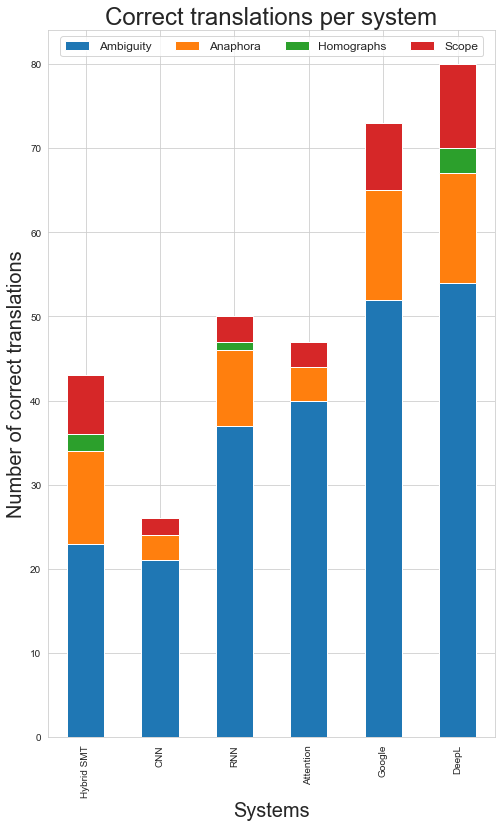

In [39]:
#create stacked barplot for correct translations
sns.set_style("whitegrid")

classification_results.plot(kind="bar", stacked=True, figsize=(8,13)).legend(
    loc='upper center', ncol=4, fontsize=12)
plt.title("Correct translations per system", fontsize=24)
plt.xlabel("Systems", fontsize=20)
plt.ylabel("Number of correct translations", fontsize=20)